In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sys, os
sys.path.insert(0, os.path.abspath('../ajwh1te/scripts'))

In [4]:
path = "../../data/raw/DataSet_ajwh1te.csv"
from scripts import project_functions
df = project_functions.load_and_process(path)
df["opening_name"] = df["opening_name"].apply(project_functions.main_opening)

*Initial analysis using the following were used to quickly view the dataset and any easy correlations.*
1. describe()
2. profile report
3. pairplot
*From these plots, the following questions were asked and answered by the plots that are listed further below:*
1. Which color is more frequently the winner?
2. What is the most frequent ending to matches?
3. Are absolute rating differences predictive of game outcomes?
4. How many plys does the common opening strategy in a chess match consume?
5. What is the most common main opening used?

In [4]:
#1: Describe
df.describe()

turns  white_rating  black_rating   opening_ply    abs_rating  \
count  20058.000000  20058.000000  20058.000000  20058.000000  20058.000000   
mean      60.465999   1596.631868   1588.831987      4.816981      7.799880   
std       33.570585    291.253376    291.036126      2.797152    249.036667   
min        1.000000    784.000000    789.000000      1.000000  -1605.000000   
25%       37.000000   1398.000000   1391.000000      3.000000   -108.000000   
50%       55.000000   1567.000000   1562.000000      4.000000      3.000000   
75%       79.000000   1793.000000   1784.000000      6.000000    122.000000   
max      349.000000   2700.000000   2723.000000     28.000000   1499.000000   

                        length  
count                    20058  
mean    0 days 02:24:57.070496  
std     0 days 13:22:22.220909  
min            0 days 00:00:00  
25%            0 days 00:00:00  
50%     0 days 00:40:06.120000  
75%     0 days 02:12:11.712500  
max    70 days 02:54:07.010000

In [5]:
#2: Profile Report
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

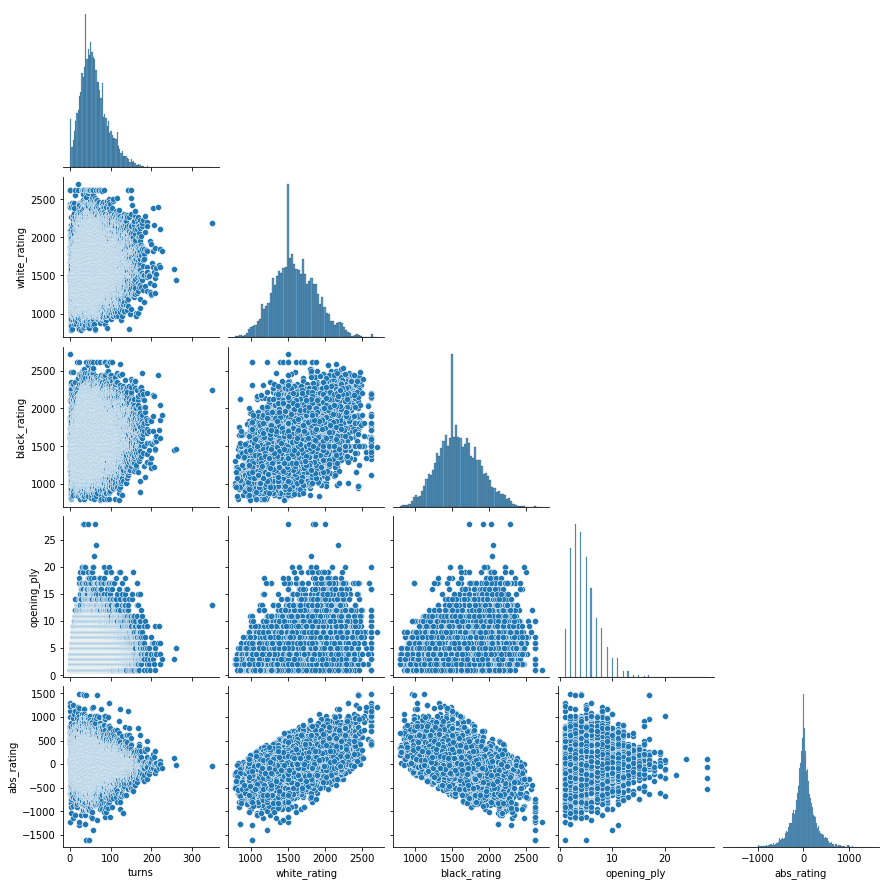

In [6]:
#3: Pairplot

sns.pairplot(data=df, corner=True)

The following plots are used to help answer the research questions, with interpretations provided with the figures.

**Which color is more frequently the winner?**
*Graph 1:*
This graph tells us that White tends to win more than black wins. This may be because White has an advantage by being allowed to play first. However, this can be argued against by the fact that Black chooses their own opening strategy to the game first by answering White's opening move (which is often Pawn to E4). This second fact is not shown in this graph. Further analysis is required to extrapolate any further information regarding why White tends to win more. The purpose of this graph is to simply answer the question "Which color is more frequently the winner?", which suggests White as the more frequent winner by winning 10 000 matches, where black wins slightly over 9 000 matches. Approximately 1000 matches end in a draw.

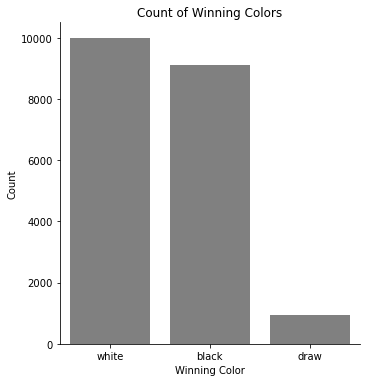

In [8]:
#Graph 1
graph1 = sns.catplot(data=df, kind="count", x="winner", color="grey")
plt.title("Count of Winning Colors")
plt.ylabel("Count")
plt.xlabel("Winning Color")
#graph1.savefig('Count of Winning Colors.png')

**What is the most frequent ending to matches?**
*Graph 2:*
This graph suggests that a player resigning is the most common way that a match finishes. Over 10 000 matches have finished with a player resigning, while the second most common ending to a match is suggested to be one player mating another, with slightly over 6000 matches ending in a mate. Finally, the less frequent endings are player running out of time (1800 matches), and draws (1000 matches).

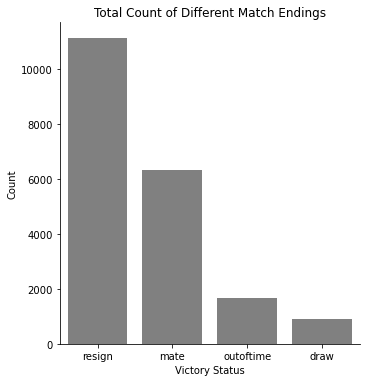

In [9]:
#Graph 2
graph2 = sns.catplot(kind="count",
                     data=df,
                     x="victory_status",
                     color="grey",
                     order=("resign",
                            "mate",
                            "outoftime",
                            "draw")
                    )
plt.title("Total Count of Different Match Endings")
plt.xlabel("Victory Status")
plt.ylabel("Count")
#graph2.savefig("Total Count of Different Match Endings")

**Are absolute rating differences predictive of game outcomes?**
*Graph 3:*
This graph tells us that a White player is more likely to be the match Winner when they have a higher rating than Black, which is shown by the positive skew of the White Violin plot. (Positive absolute ratings mean White has greater rating than Black. Negative absolute ratings mean Black has greater rating than White). This is similar for Black, where a Black with a higher rating than White is more likely to be the match winner, as shown by the negative skew on the violin plot of Black Violin Plot. This is what was expected of this plot: A higher rating for either color is more likely to correlate with a match win. 

One interesting aspect of note is the second slight curve on the positive Absolute Rating for the Draw Violin Plot. From this second curve, we may be able to infer that a White player with a higher rating than a Black player may be more likely to end in a draw than a Black player with a higher rating. Further analysis that is beyond the scope of this figure is needed for a more accurate conclusion of this note. 

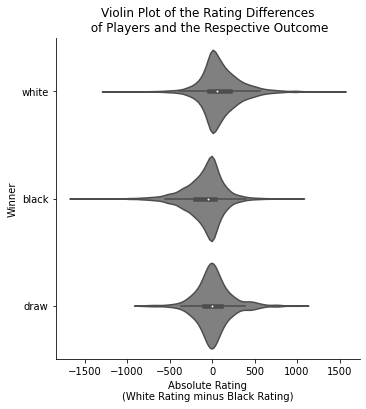

In [10]:
#Graph 3
graph3 = sns.catplot(data=df, kind='violin', x="abs_rating", y="winner", color="grey")
plt.title("Violin Plot of the Rating Differences\n of Players and the Respective Outcome")
plt.ylabel("Winner")
plt.xlabel("Absolute Rating\n(White Rating minus Black Rating)")
#graph3.savefig("Absolute Ratings vs Match Outcomes")

**How many plys does the common opening strategy in a chess match consume?** 
*Graph 4:*
This countplot infers that most 3 plys is the most common length of plys for an opening strategy. (When a player makes a move, this is known as a ply. When the other player makes a ply and the responsibility to move a piece falls back on the initial player, this is known as a "turn". A ply is a half-turn.) While some strategies are determines in a single ply (approximately 1100 matches), while some take as many as 28 plys. The most common length falls at 3 plys, and the distribution of curve is negatively skewed (meaning that most opening strategies are determined in lower number of plys).

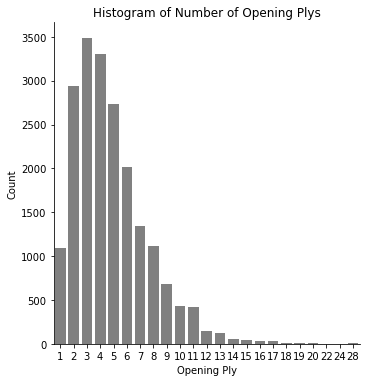

In [11]:
graph4 = (sns.catplot(data=df, kind="count", x="opening_ply", color="grey"))
plt.ylabel("Count")
plt.xlabel("Opening Ply")
plt.title("Histogram of Number of Opening Plys")
#graph4.savefig("Histogram of Opening Plys")

**What is the most common main opening used?**
*Graph 5:*
This graph strips away all codes and additions to opening names, and tells us the most common opening strategies used without having to reference the strategies that were accepted, declined, refused, or any variations to the openings. They are grouped into their main openings, with the top 15 openings being pulled and placed into this plot. We can see that the "Sicilian Defense" is by far the most used opening strategy, with over 2 500 matches using this strategy. The next most frequent strategy used is the "French Defense" with over 1 500 matches using it. The amount that the rest of the strategies are used continue to decline slightly from left to right: Out of the top 15 strategies pulled, we see that Zukertort Opening is the least common opening strategy, with under 500 matches using this strategy (far right).

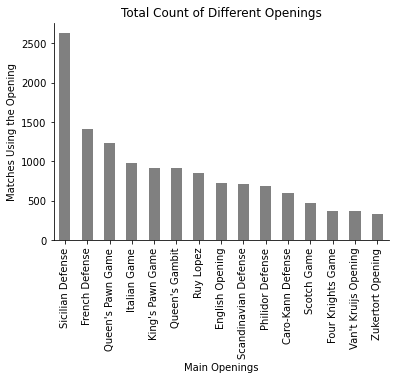

In [13]:
#Graph 5
df1 = (df
       .groupby(df['opening_name'])
       .size()
       .nlargest(15)
      )
graph5 = (df1
          .plot(kind="bar", x="opening_name", color="grey")
         )
plt.ylabel("Matches Using the Opening")
plt.xlabel("Main Openings")
plt.title("Total Count of Different Openings")
graph5.spines['top'].set_visible(False)
graph5.spines['right'].set_visible(False)
#graph5.savefig("Total Count of Different Openings")